Link to data: https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
columns = df.columns
columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
values = df.values
values

array([['2006-04-01 00:00:00.000 +0200', 'Partly Cloudy', 'rain', ...,
        0.0, 1015.13, 'Partly cloudy throughout the day.'],
       ['2006-04-01 01:00:00.000 +0200', 'Partly Cloudy', 'rain', ...,
        0.0, 1015.63, 'Partly cloudy throughout the day.'],
       ['2006-04-01 02:00:00.000 +0200', 'Mostly Cloudy', 'rain', ...,
        0.0, 1015.94, 'Partly cloudy throughout the day.'],
       ...,
       ['2016-09-09 21:00:00.000 +0200', 'Partly Cloudy', 'rain', ...,
        0.0, 1015.66, 'Partly cloudy starting in the morning.'],
       ['2016-09-09 22:00:00.000 +0200', 'Partly Cloudy', 'rain', ...,
        0.0, 1015.95, 'Partly cloudy starting in the morning.'],
       ['2016-09-09 23:00:00.000 +0200', 'Partly Cloudy', 'rain', ...,
        0.0, 1016.16, 'Partly cloudy starting in the morning.']],
      dtype=object)

In [ ]:
df["Temperature (C)"]

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [ ]:
df[["Temperature (C)", "Humidity"]]

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
...,...,...
96448,26.016667,0.43
96449,24.583333,0.48
96450,22.038889,0.56
96451,21.522222,0.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


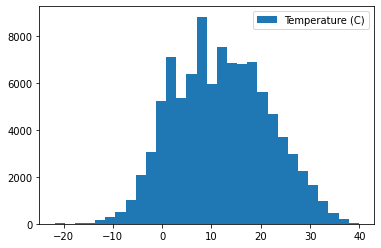

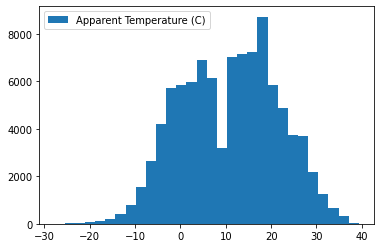

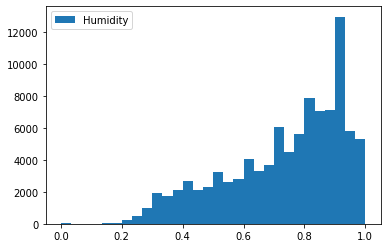

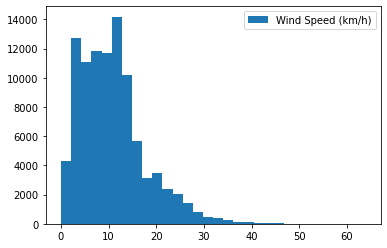

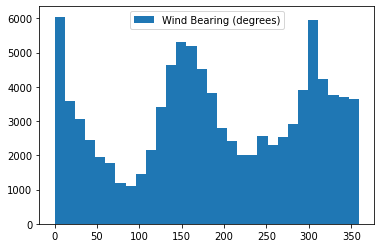

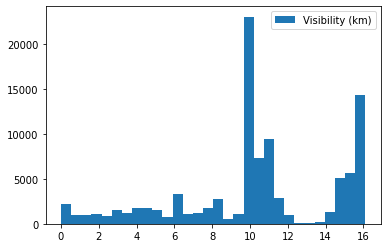

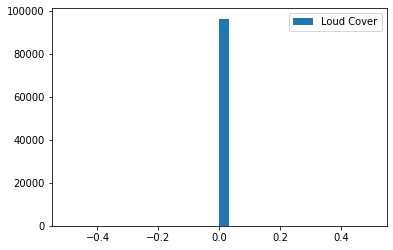

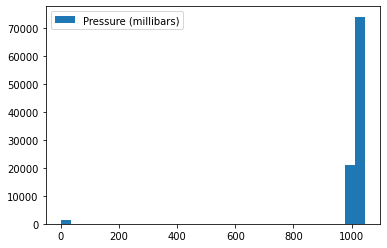

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

def plot_data_hist(df, columns):
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      _ = plt.figure()
      plt.hist(X, bins=30)
      plt.legend([column])
      plt.show()

columns = df.columns
plot_data_hist(df, columns)

In [ ]:
df["Loud Cover"].min(), df["Loud Cover"].max(), df["Loud Cover"].std()

(0.0, 0.0, 0.0)

In [ ]:
# find IQR
# compute: LQ - 1.5 * IQR = lim1
# compute: UQ + 1.5 * IQR = lim2
# check if data is outisde lim1, lim2
LQ = np.quantile(df["Pressure (millibars)"], 0.25)
UQ = np.quantile(df["Pressure (millibars)"], 0.75)
IQR = UQ - LQ
lower_limit = LQ - 1.5 * IQR
upper_limit = UQ + 1.5 * IQR

print(lower_limit, upper_limit, IQR)

998.1149999999999 1034.875 9.190000000000055


In [ ]:
df[df["Pressure (millibars)"] < lower_limit] = None
df[df["Pressure (millibars)"] > upper_limit] = None 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            92053 non-null  object 
 1   Summary                   92053 non-null  object 
 2   Precip Type               91555 non-null  object 
 3   Temperature (C)           92053 non-null  float64
 4   Apparent Temperature (C)  92053 non-null  float64
 5   Humidity                  92053 non-null  float64
 6   Wind Speed (km/h)         92053 non-null  float64
 7   Wind Bearing (degrees)    92053 non-null  float64
 8   Visibility (km)           92053 non-null  float64
 9   Loud Cover                92053 non-null  float64
 10  Pressure (millibars)      92053 non-null  float64
 11  Daily Summary             92053 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


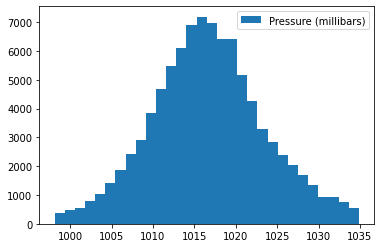

In [ ]:
X = np.array(df["Pressure (millibars)"].values)
_ = plt.figure()
plt.hist(X, bins=30)
plt.legend(["Pressure (millibars)"])
plt.show()

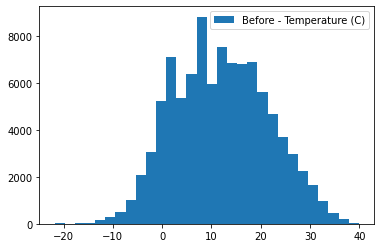

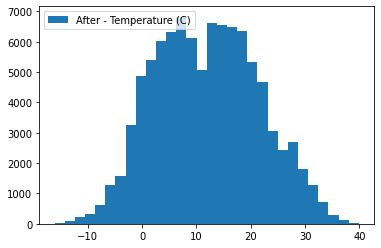

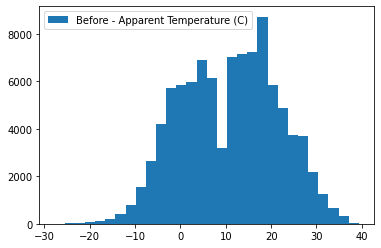

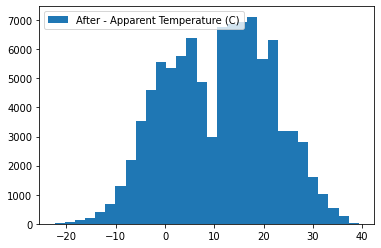

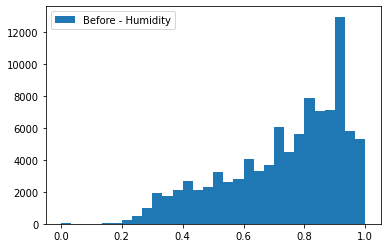

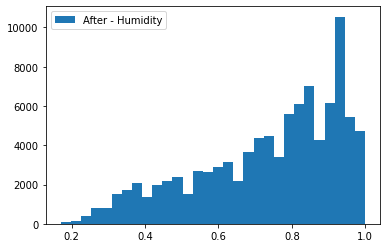

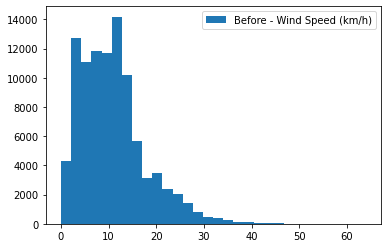

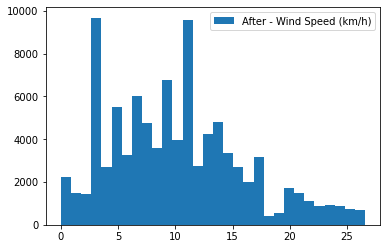

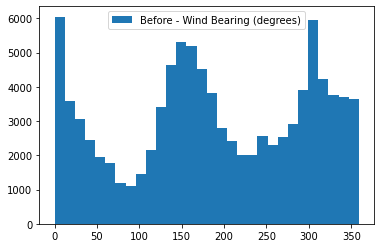

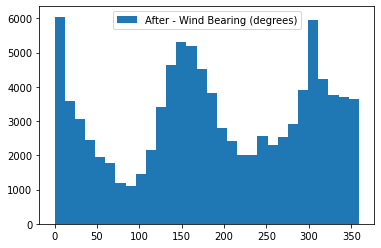

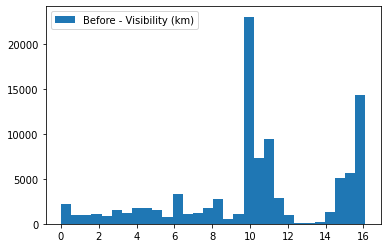

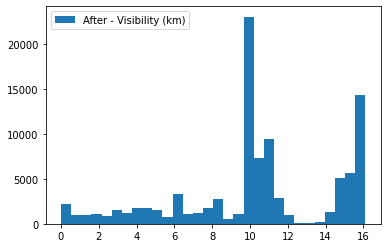

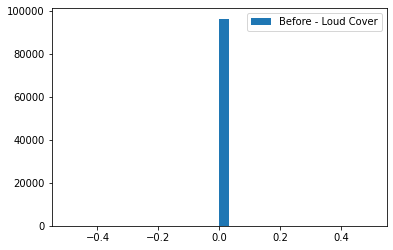

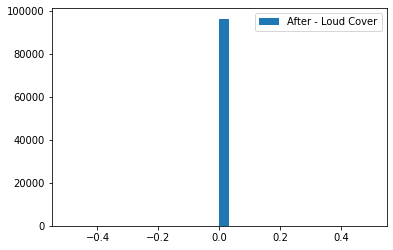

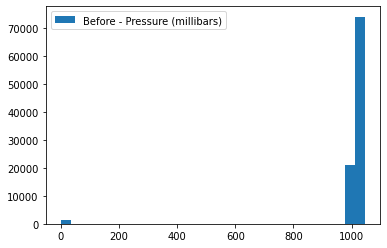

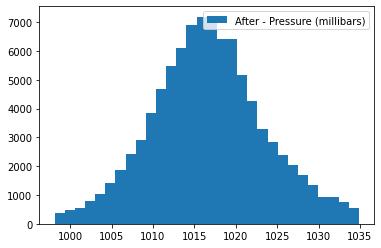

In [ ]:
def plot_hist(X, legend):
  _ = plt.figure()
  plt.hist(X, bins=30)
  plt.legend([legend])
  plt.show()


def remove_outliers_iqr(X):
  LQ = np.quantile(X, 0.25)
  UQ = np.quantile(X, 0.75)
  IQR = UQ - LQ
  lower_limit = LQ - 1.5 * IQR
  upper_limit = UQ + 1.5 * IQR
  
  X[X < lower_limit] = None
  X[X > upper_limit] = None 

  return X

def remove_outliers(df):
  for column in df.columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      plot_hist(X, f"Before - {column}")
      X = np.array(df[column].values)
      X = remove_outliers_iqr(X)
      plot_hist(X, f"After - {column}")

df = pd.read_csv("weatherHistory.csv")
remove_outliers(df)

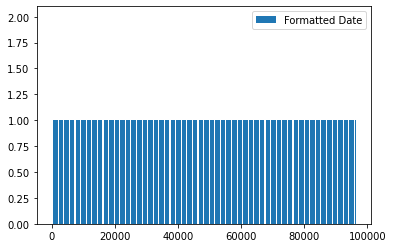

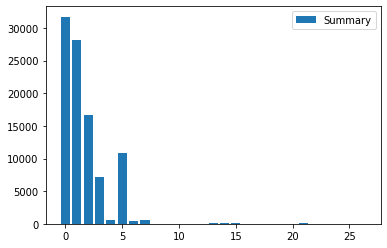

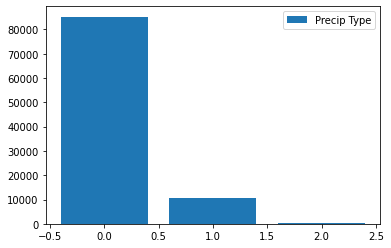

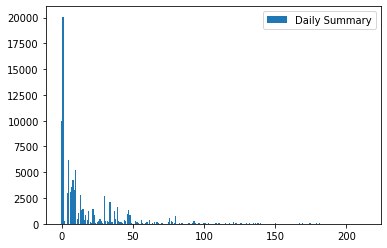

In [ ]:
# 1. Plot histograms for objects columns
def count_instances(X):
  counts = {}
  for value in X:
    if counts.get(value) is not None:
      counts[value] += 1
    else:
      counts[value] = 1

  return counts

def plot_categorical_hist(counts, legend):
  # TODO: Modify to plot keys as x 
  x = range(len(counts))
  y = list(counts.values())

  _ = plt.figure()
  plt.bar(x, y)
  plt.legend([legend])
  plt.show()

df = pd.read_csv("weatherHistory.csv")
for column in df.columns:
  if df[column].dtype == object:
    X = np.array(df[column].values)
    counts = count_instances(X)
    plot_categorical_hist(counts, column)

In [ ]:
daily_summary = df["Daily Summary"]

0             Partly cloudy throughout the day.
1             Partly cloudy throughout the day.
2             Partly cloudy throughout the day.
3             Partly cloudy throughout the day.
4             Partly cloudy throughout the day.
                          ...                  
96448    Partly cloudy starting in the morning.
96449    Partly cloudy starting in the morning.
96450    Partly cloudy starting in the morning.
96451    Partly cloudy starting in the morning.
96452    Partly cloudy starting in the morning.
Name: Daily Summary, Length: 96453, dtype: object

In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
clean_data = df.drop(["Formatted Date", "Summary", "Loud Cover", "Daily Summary"], axis=1)
clean_data.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
y = clean_data["Precip Type"]
X = clean_data.drop("Precip Type", axis=1)

In [ ]:
X.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
y.describe()

count     95936
unique        2
top        rain
freq      85224
Name: Precip Type, dtype: object

In [20]:
# TODO: Replace outliers with None for each column - Done
# TODO: Remove rows that have None values - Done
# Hint: When you remove rows from X, make sure to remove the same rows from y 
import numpy as np

def split_data(df):
  clean_data = df.drop(["Formatted Date", "Summary", "Loud Cover", "Daily Summary"], axis=1)
  y = clean_data["Precip Type"]
  X = clean_data.drop("Precip Type", axis=1)
  return X, y


def remove_df_outliers_iqr(df):
  columns = df.columns
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      LQ = np.quantile(X, 0.25)
      UQ = np.quantile(X, 0.75)
      IQR = UQ - LQ
      lower_limit = LQ - 1.5 * IQR
      upper_limit = UQ + 1.5 * IQR
    
      df[df[column] < lower_limit] = None
      df[df[column] > upper_limit] = None 
      df = df.dropna()

  return df 

In [21]:
df = pd.read_csv("weatherHistory.csv")
df = remove_df_outliers_iqr(df)
X, y = split_data(df)
len(X), len(y)

<ipython-input-20-c9c733966b56>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-20-c9c733966b56>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

(88641, 88641)

In [23]:
# TODO: Try to code the correlation coef for two columns
# TODO: Try to code the correlation coef for one column wrt all other columns
# Hint: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
def correlation(x1, x2):
  # sum( (x1i - x10) * (x2i - x20) ) / sqrt (sum (x1i - x10)^2 * sum (x2i - x20) ^ 2)
  x10 = np.mean(x1)
  x20 = np.mean(x2)

  x1_dif = x1 - x10
  x2_dif = x2 - x20

  x1_dif_sq = x1_dif ** 2
  x2_dif_sq = x2_dif ** 2

  top = np.sum(x1_dif * x2_dif)
  bottom = np.sqrt(np.sum(x1_dif_sq) * np.sum(x2_dif_sq))

  try:
    coef = top / bottom
    return coef 
  except Exception as e:
    raise e

In [27]:
x1 = np.array(X["Temperature (C)"].values)
x2 = np.array(X["Apparent Temperature (C)"].values)
correlation(x1, x2)

0.9935034982696647

In [32]:
correlation_matrix = []

for column1 in X.columns:
  correlation_row = []
  for column2 in X.columns:
    x1 = np.array(X[column1].values)
    x2 = np.array(X[column2].values)
    coeff = correlation(x1, x2)
    correlation_row.append(coeff)
  
  correlation_matrix.append(correlation_row)

correlation_matrix = np.array(correlation_matrix)

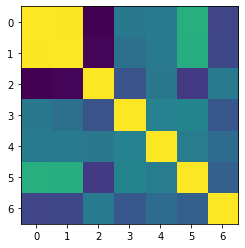

In [33]:
import matplotlib.pyplot as plt 

_ = plt.figure()
plt.imshow(correlation_matrix)
plt.show()

In [31]:
X.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [34]:
min_correlation_coeff_threshold = -0.75
max_correlation_coeff_threshold = 0.75

columns_to_remove = []
n_features = len(X.columns)
for i in range(n_features):
  for j in range(i+1, n_features):
    if correlation_matrix[i, j] > max_correlation_coeff_threshold or correlation_matrix[i, j] < min_correlation_coeff_threshold:
      columns_to_remove.append(j)

columns_to_remove 

[1]

In [35]:
columns_to_remove_names = []
for col_index in columns_to_remove:
  columns_to_remove_names.append(X.columns[col_index])
X = X.drop(columns_to_remove_names, axis=1)
X.head()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51
